In [3]:
def printfig(fig, name):
    dpi_exp = None
    bbox = 'tight'
    path = '../../paper/5f22d412742c360001c92b46/fig/'
    #path = '../../GrimaldiEtAl2020HOTS_clone_laurent/fig'
    fig.savefig(path+name, dpi = dpi_exp, bbox_inches=bbox, transparent=True)

# Illustration of homeostatic gain control

In [5]:
%cd '../HOTS'
from Tools import netparam
import numpy as np
import matplotlib.pyplot as plt

sigma = None
homeinv = False
jitter = False
R = 2
tau = 5
nbclust = [4,8,16]
filt = 2
timestr = '2021-03-29'
dataset = 'nmnist'
name = 'hots'

hotshom, homeotest = netparam(name, filt, tau, nbclust, sigma, homeinv, jitter, timestr, dataset, R)

/home/antoine/homhots/HOTS/HOTS


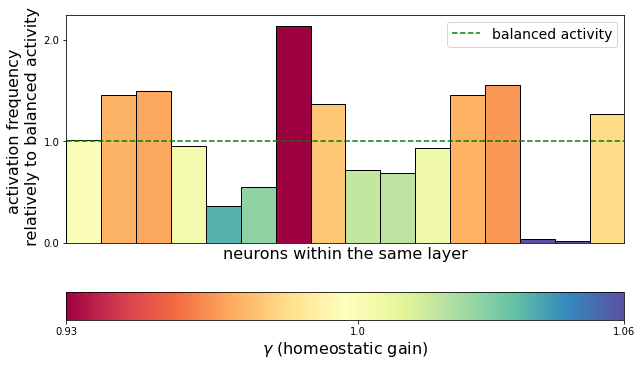

In [2]:
def gainhom(x):
    homparam = [.25, 1]
    N = 4
    return np.exp(homparam[0]*(1/N-N**homparam[1]*x))

gain = gainhom(hotshom.L[2].cumhisto/np.sum(hotshom.L[2].cumhisto))
colors = (gain-min(gain))/(max(gain)-min(gain))
colormap = plt.cm.get_cmap('Spectral', 1000);
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(np.arange(16), hotshom.L[2].cumhisto/np.sum(hotshom.L[2].cumhisto), width=1, align='edge', ec="k", color=colormap(colors));
ax.set_xlim([0,16]);
ax.set_xlabel('neurons within the same layer', fontsize=16);
ax.set_ylabel('activation frequency \n relatively to balanced activity', fontsize=16);
ax.set_yticks([0,1/16, 2/16, 3/16])
ax.set_yticklabels(ax.get_yticks()*16)
ax.set_xticks(());
ax.hlines(1/16,0,16, linestyles='dashed', color='green', label='balanced activity');
ax.legend(fontsize = 14);
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=colormap), orientation='horizontal', ticks=[min(gain), 1, max(gain)])
cbar.set_label('$\gamma$ (homeostatic gain)', labelpad=3, fontsize=16);
mini = min(gain)
maxi = max(gain)
interval = (max(gain)-min(gain))/5
onepoint = (1-mini)/(maxi-mini)
cbar.set_ticks([0,onepoint,1]);
cbar.ax.set_xticklabels(np.round([mini, 1, maxi],2));

In [ ]:
printfig(fig, 'homeostasis.pdf')

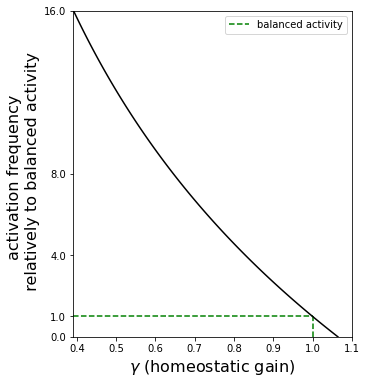

In [9]:
x = np.linspace(0,1,100)
y = gainhom(x)
fig, ax = plt.subplots(figsize=(5,6))
ax.plot(y,x, 'k')
ax.set_ylabel('activation frequency \n relatively to balanced activity', fontsize=16);
ax.set_xlabel('$\gamma$ (homeostatic gain)', fontsize=16);
ax.set_yticks([0,1/16, 4/16, 8/16, 1])
ax.set_yticklabels(ax.get_yticks()*16)
ax.vlines(1,0,1/16, linestyles='dashed', color='green', label='balanced activity')
ax.hlines(1/16,0.39,1, linestyles='dashed', color='green')
ax.axis([0.39,1.1,0,1]);
ax.legend();

In [ ]:
printfig(fig, 'homeogaincurve.pdf')

# Stream of events illustration

Using downloaded and verified file: ../Data/pips_test.tar.gz
Extracting ../Data/pips_test.tar.gz to ../Data/


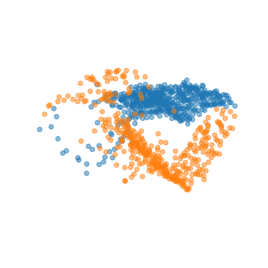

In [7]:
import tonic
learningset = tonic.datasets.POKERDVS(save_to='../Data/', train = False,
                                transform=None)
loader = tonic.datasets.DataLoader(learningset, shuffle=True)

X_on, Y_on, T_on, X_off, Y_off, T_off = ([] for i in range(6))
iev = 100
events, target = next(iter(loader))
target_event = events.shape[1]
target_event = 1000
while iev<target_event:
    x,y,t,p = events[0][iev][learningset.ordering.find("x")].item(), \
            events[0][iev][learningset.ordering.find("y")].item(), \
            events[0][iev][learningset.ordering.find("t")].item(), \
            events[0][iev][learningset.ordering.find("p")].item()
    if p:
        X_on.append(x)
        Y_on.append(abs(learningset.sensor_size[1]-y))
        T_on.append(t)
    else:
        X_off.append(x)
        Y_off.append(abs(learningset.sensor_size[1]-y))
        T_off.append(t)
    iev+=1
fig = plt.figure(figsize=(10,5))
sub1 = fig.add_subplot(1,2,1, projection="3d")
sub1.scatter(T_on, X_on, Y_on, cmap= plt.cm.plasma, alpha=0.5)
sub1.scatter(T_off, X_off, Y_off, cmap= plt.cm.plasma, alpha=0.5)
#sub1.arrow([0,max(T_off)], [0,0], [0,0])
sub1.view_init(10,-40)
sub1.grid(b = None)
sub1.set_xlabel('time')
sub1.axis('off')
plt.show()

In [ ]:
printfig(fig, 'stream.png')

# Time Surface illustration

In [9]:
from TimeSurface import TimeSurface

In [10]:
learningset = tonic.datasets.NMNIST(save_to='../Data/', train = False,
                                transform=None)
loader = tonic.datasets.DataLoader(learningset, batch_size=1, shuffle=True)

TS = TimeSurface(R=2,tau=5*10e3,camsize=[34,34])
events, target = next(iter(loader))
# target_event = 3300
flxT = TS.spatpmat.copy()
flxT[:] = np.nan
iev = 0
while iev<events.shape[1]:
    x,y,t,p = events[0][iev][learningset.ordering.find("x")].item(), \
                events[0][iev][learningset.ordering.find("y")].item(), \
                events[0][iev][learningset.ordering.find("t")].item(), \
                events[0][iev][learningset.ordering.find("p")].item(),
    flxT[p,x,y] = t
    ts, activ = TS.addevent(x,y,t,p)
    iev+=1

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


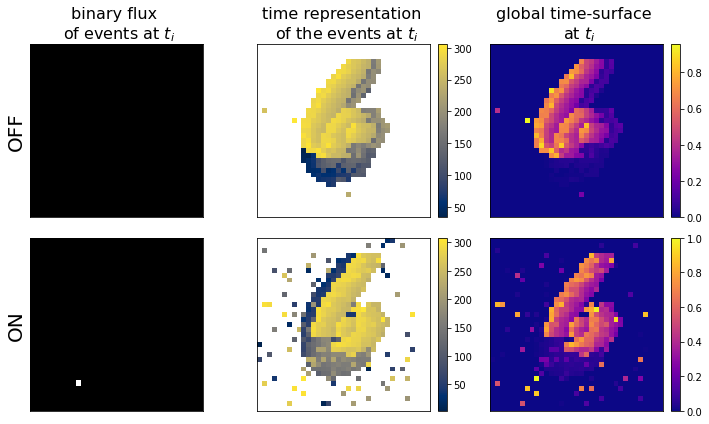

In [11]:
polaritiz = ['OFF','ON']
gamma = 1
fig, axs = plt.subplots(2,3,figsize=(10,6))

Ti = np.zeros(learningset.sensor_size)
singev = axs[abs(p-1),0].imshow(Ti.T, cmap='gray')
axs[abs(p-1),0].set_title('binary flux \n of events at $t_i$', fontsize=16)
axs[abs(p-1),0].set_ylabel(f'{polaritiz[abs(p-1)]}', fontsize=20)
axs[abs(p-1),0].set_xticks(())
axs[abs(p-1),0].set_yticks(())

Ti[x,y] = 1
singev = axs[p,0].imshow(Ti.T, cmap='gray')
#axs[p,0].set_title('binary flux of events at $t_i$', fontsize=16) #for NN
if p==0:
    axs[p,0].set_title('event recording at $t_i$', fontsize=16)
axs[p,0].set_ylabel(f'{polaritiz[p]}', fontsize=20)
axs[p,0].set_xticks(())
axs[p,0].set_yticks(())

for p in [0,1]:
    T = axs[p,1].imshow(flxT[p].T*1e-3, cmap='cividis')
    #axs[p,1].set_title('T flux at $t_i$ (in $ms$)', fontsize=16) #for NN
    if p==0:
        axs[p,1].set_title('time representation \n of the events at $t_i$', fontsize=16)
    axs[p,1].set_xticks(())
    axs[p,1].set_yticks(())
    plt.colorbar(T, ax=axs[p,1], fraction=0.046, pad=0.04);
    
    S = axs[p,2].imshow(TS.spatpmat[p].T, cmap=plt.cm.plasma)
    #axs[p,2].set_title('S flux at $t_i$', fontsize=16) #for NN
    if p==0:
        axs[p,2].set_title('global time-surface \n at $t_i$', fontsize=16)
    axs[p,2].set_xticks(())
    axs[p,2].set_yticks(())
    cbar = plt.colorbar(S, ax=axs[p,2], fraction=0.046, pad=0.04);
    #cbar.set_label(fonsize=16)
    
fig.tight_layout()

In [ ]:
printfig(fig, 'flux.pdf')

# Channels

In [13]:
import numpy as np
import matplotlib.pyplot as plt
nb_events = 20
nb_channels = 10
tmax = 1000
tau = 100
a = np.random.randint(nb_channels,size = nb_events)
t = np.random.randint(tmax,size = nb_events)
t = np.sort(t)
t = np.unique(t)
a = a[:len(t)]

time = np.linspace(0,max(t)*3,max(t)*3)
y = np.zeros([nb_channels, len(time)])
for c in range(nb_channels):
    t_ev_c = t[np.where(a==c)[0]]
    for i in range(len(t_ev_c)):
        x_tp = np.linspace(0,max(t)-t_ev_c[i],max(t)-t_ev_c[i])
        y_tp = np.exp(-x_tp/tau)
        y[c,t_ev_c[i]:t_ev_c[i]+len(y_tp)] = y_tp

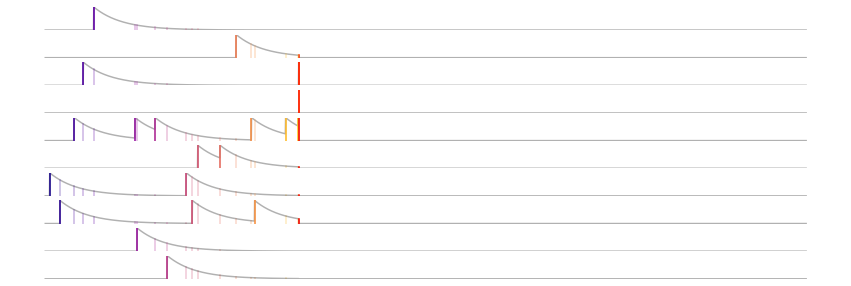

In [14]:
fig, ax = plt.subplots(10,1,figsize = (15,5))
color = plt.cm.plasma(np.linspace(0,0.9,max(t)+1))
for c in range(nb_channels):
    ax[c].plot(time,y[c,:],'k', alpha=0.3)
    ax[c].axis('off')
    ax[c].set_ylim([0,1])
    t_ev_c = t[np.where(a==c)[0]]
    for i in range(len(t_ev_c)):
        ax[c].plot([t_ev_c[i],t_ev_c[i]],[0,1], color = (color[t_ev_c[i],:]))
        for cha in range(nb_channels):
            ax[cha].plot([t_ev_c[i],t_ev_c[i]],[0,y[cha,t_ev_c[i]]], color = (color[t_ev_c[i],:]), alpha=0.3)
    tlast = t[-1]-1
    #print(y[c,tlast-1])
    ax[c].plot([tlast,tlast],[0,y[c,tlast]], color = 'red', alpha=1)
ax[a[-1]].plot([tlast,tlast],[0,1], color = 'red', alpha=1)

In [ ]:
printfig(fig, 'inputlayer.pdf')